In [3]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv('dataset/1724929644/dataset-30d.csv')
df2 = pd.read_csv('dataset/1724929644/dataset-60d-30d.csv')
df3 = pd.read_csv('dataset/1724929644/dataset-90d-60d.csv')

In [5]:
def preprocess(df):
    thresholds = {
        'axialAxisRmsVibration': 0.1,
        'radialAxisKurtosis': 3,
        'radialAxisPeakAcceleration': 0.05,
        'radialAxisRmsAcceleration': 0.01
    }
    df['is_running'] = 1
    df.loc[
        (df['axialAxisRmsVibration'] < thresholds['axialAxisRmsVibration']) & 
        (df['radialAxisKurtosis'] < thresholds['radialAxisKurtosis']) & 
        (df['radialAxisPeakAcceleration'] < thresholds['radialAxisPeakAcceleration']) & 
        (df['radialAxisRmsAcceleration'] < thresholds['radialAxisRmsAcceleration']),
        'is_running'
    ] = 0
    return df

In [6]:
processed_df1 = preprocess(df=df1)
processed_df2 = preprocess(df=df2)
processed_df3 = preprocess(df=df3)

In [7]:
def plot_with_thresholds(df, columns, thresholds):
    plt.figure(figsize=(15, 20))
    for i, col in enumerate(columns, 1):
        plt.subplot(len(columns), 1, i)
        
        # Plot the data with a default color (blue)
        plt.plot(df.index, df[col], color='blue', label=col, alpha=0.7)
        
        # Plot yellow points where this column is below threshold and the machine isn't fully stopped
        yellow_points = df[(df[col] < thresholds[col]) & (df['is_running'] == 1)]
        plt.plot(yellow_points.index, yellow_points[col], 'o', color='yellow', markersize=4, label=f'{col} Below Threshold')

        # Plot red points where the machine is fully stopped (all columns below thresholds)
        red_points = df[df['is_running'] == 0]
        plt.plot(red_points.index, red_points[col], 'o', color='red', markersize=4, label='Machine Stopped')
        
        plt.xlabel("Time")
        plt.ylabel(col)
        plt.title(f"{col} Over Time")
        plt.legend()

    plt.tight_layout()
    plt.show()

In [11]:
columns_to_plot = [
    'axialAxisRmsVibration', 'radialAxisKurtosis', 
    'radialAxisPeakAcceleration', 'radialAxisRmsAcceleration'
]

In [12]:
thresholds = {
    'axialAxisRmsVibration': 0.1,
    'radialAxisKurtosis': 3,
    'radialAxisPeakAcceleration': 0.05,
    'radialAxisRmsAcceleration': 0.01
}

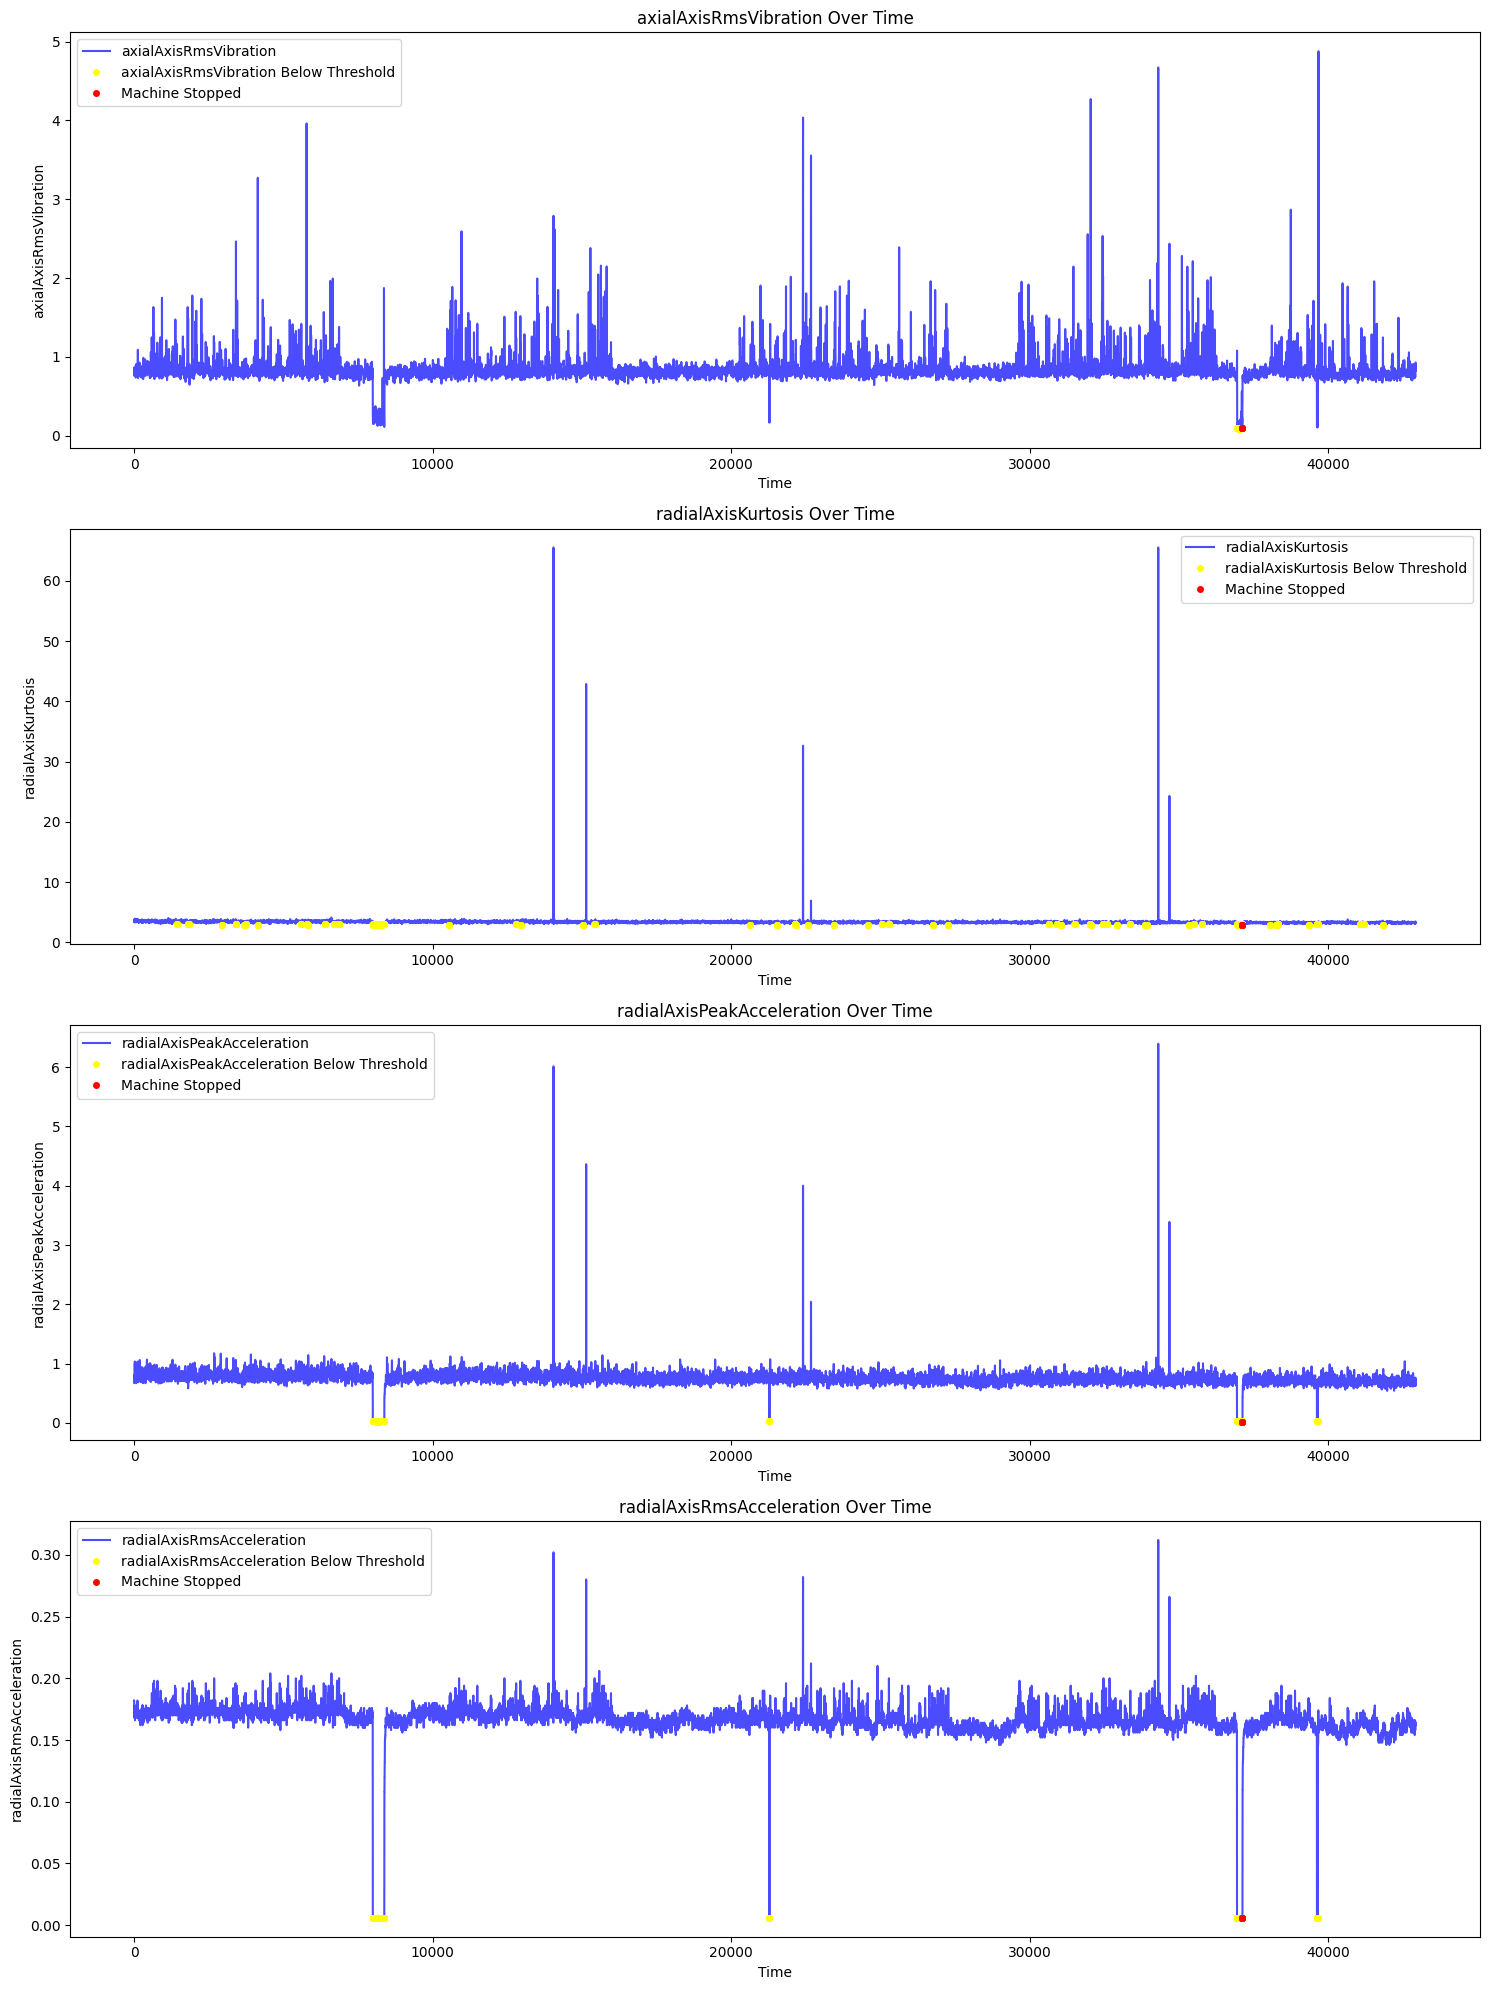

In [13]:
plot_with_thresholds(df=processed_df1, columns=columns_to_plot, thresholds=thresholds)

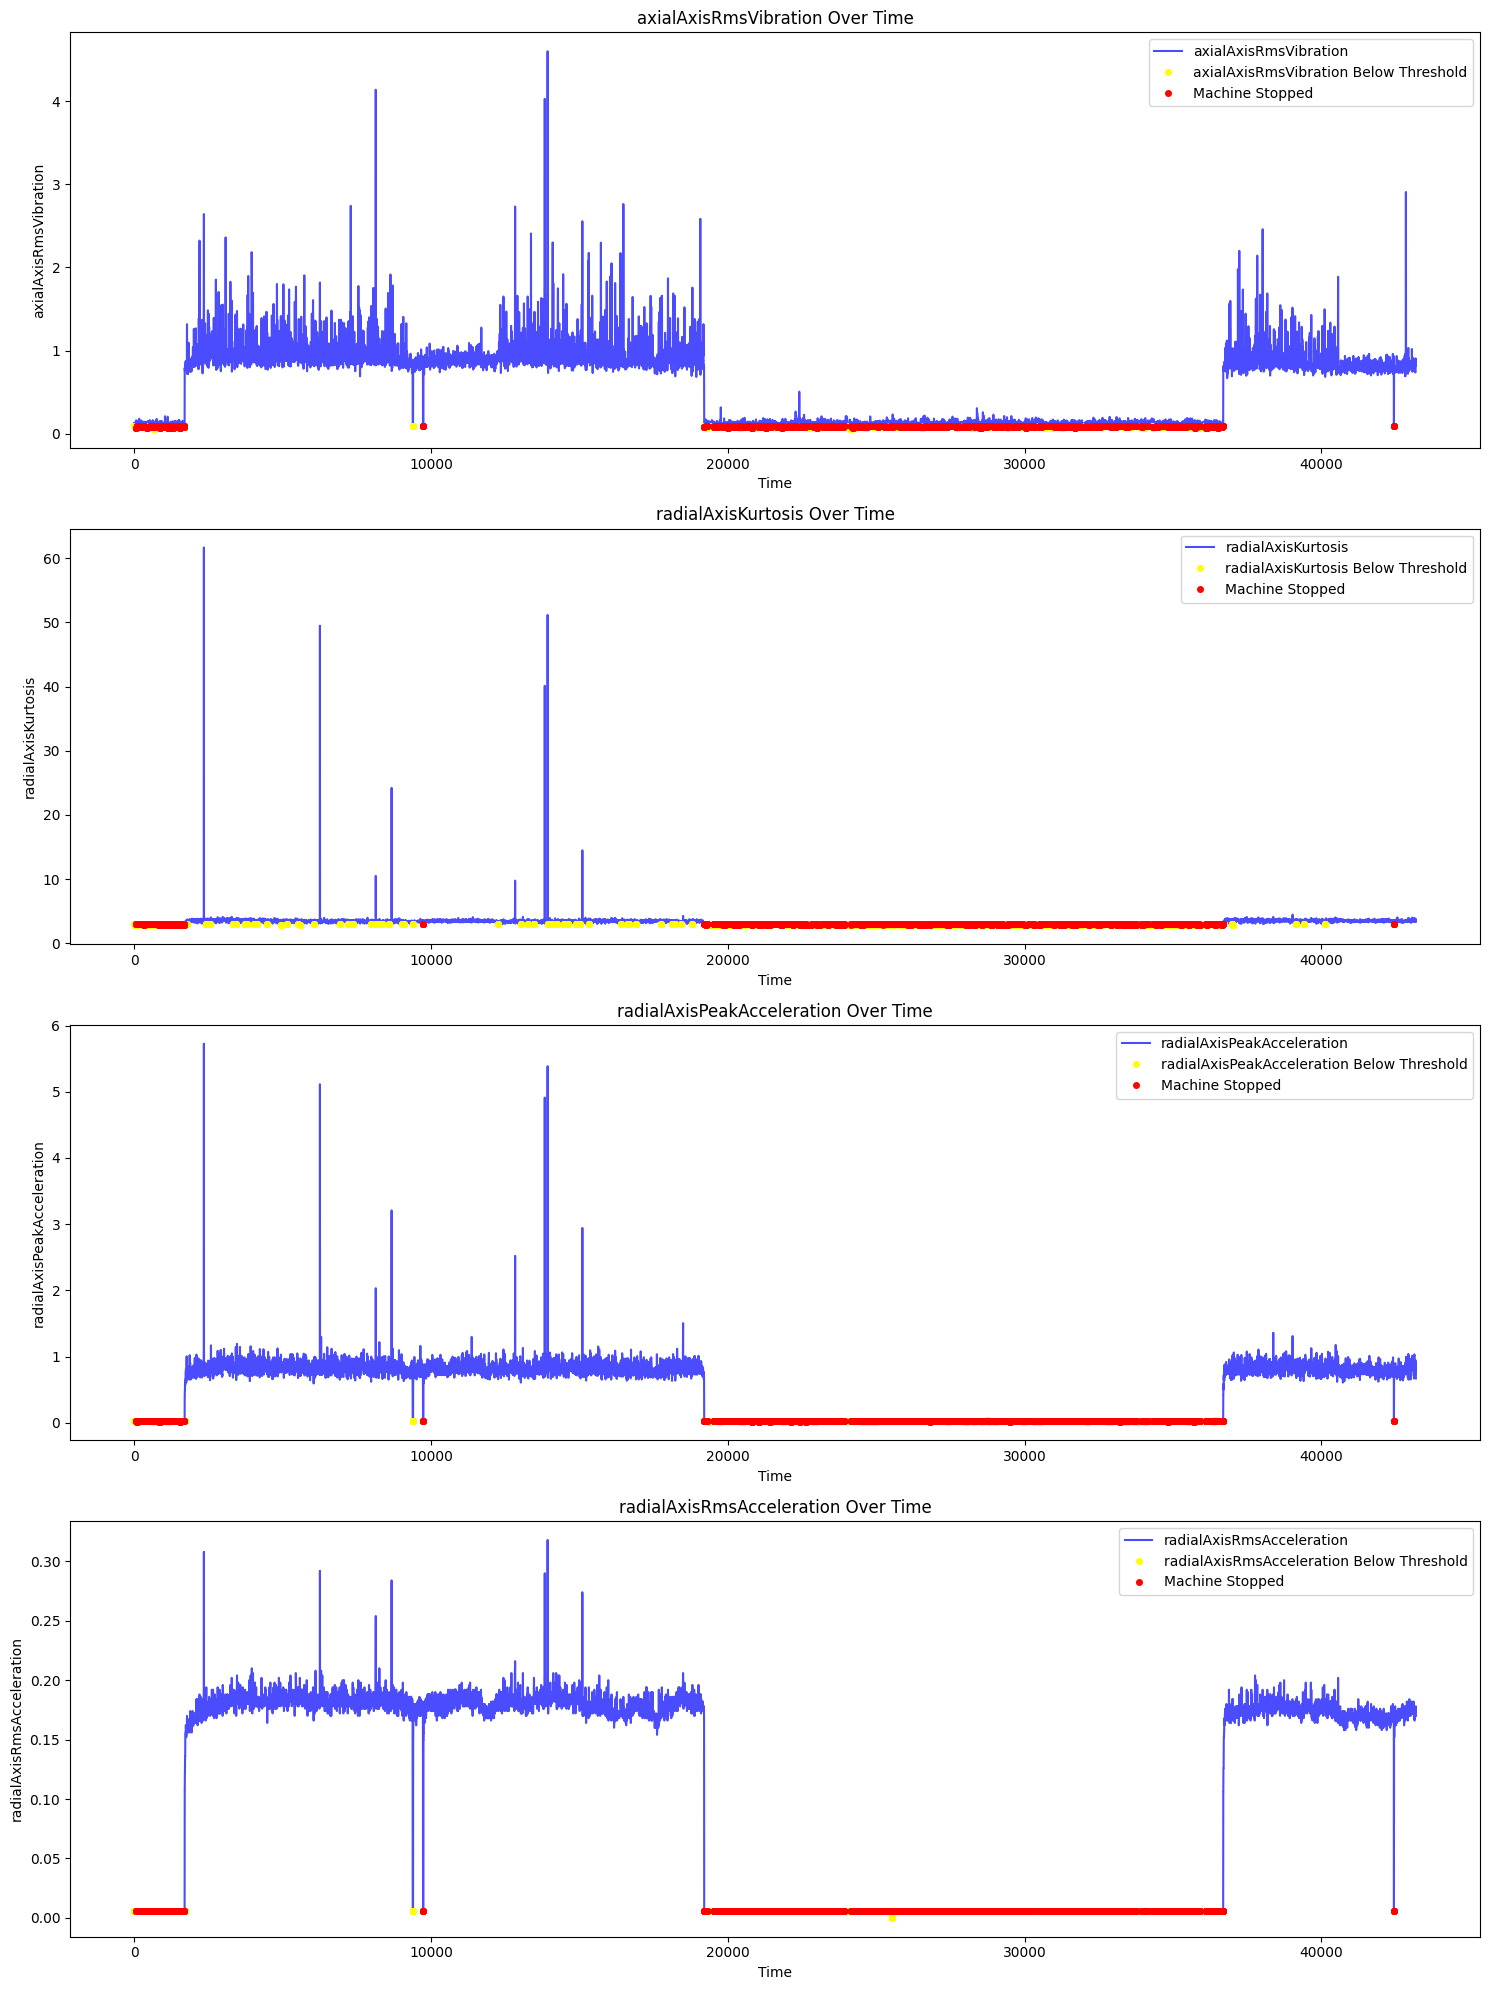

In [14]:
plot_with_thresholds(df=processed_df2, columns=columns_to_plot, thresholds=thresholds)

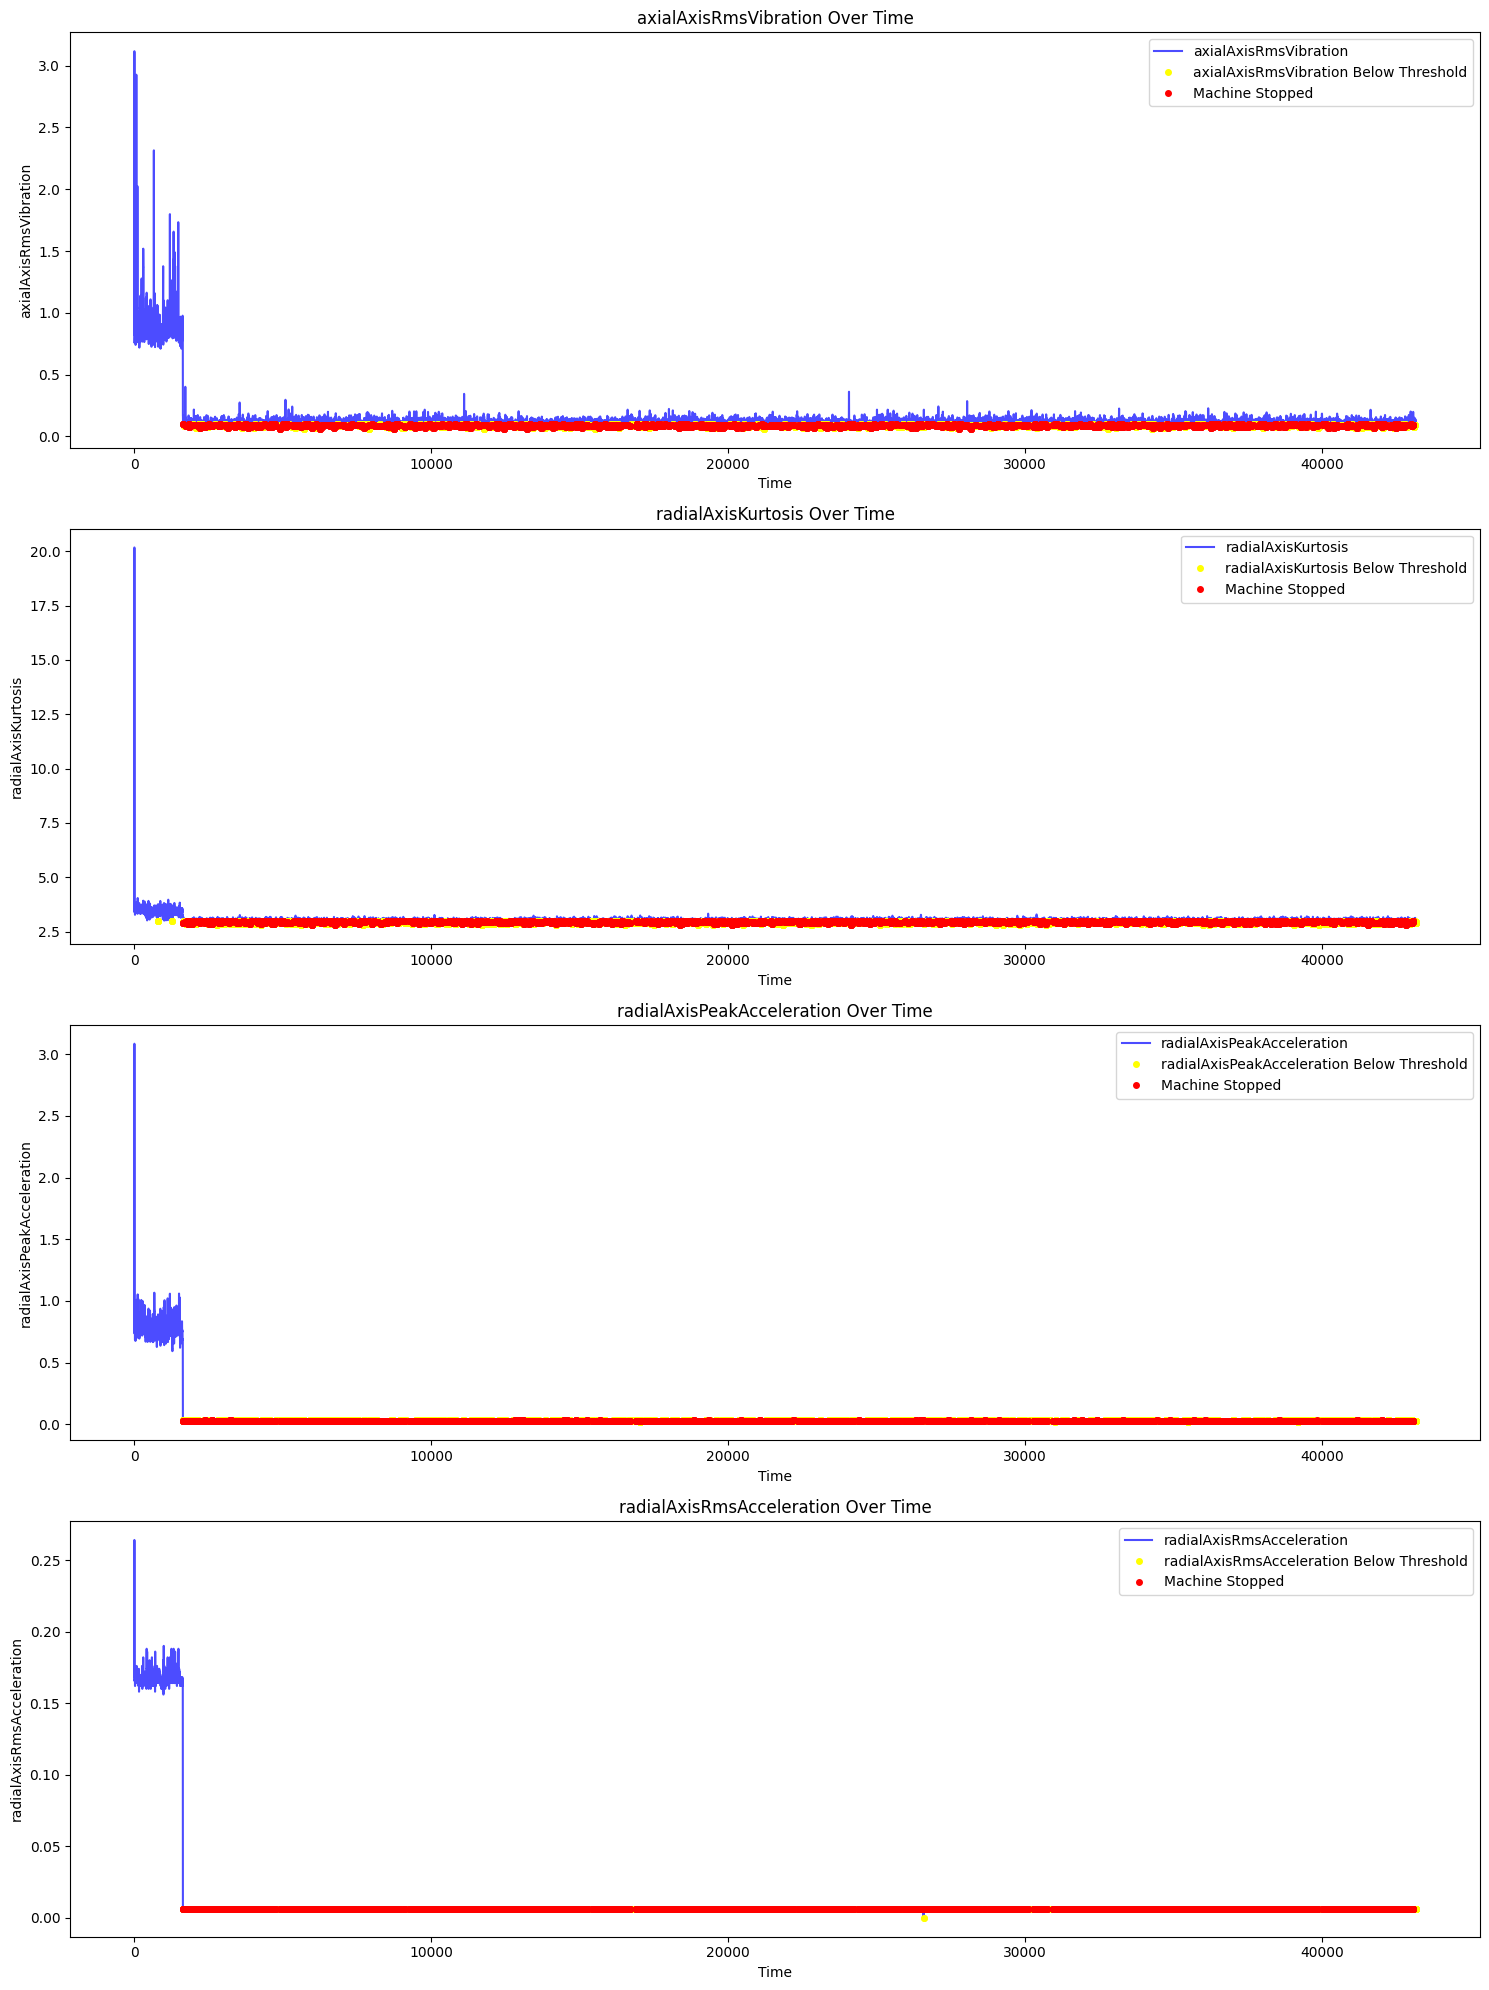

In [15]:
plot_with_thresholds(df=processed_df3, columns=columns_to_plot, thresholds=thresholds)

In [16]:
df2.shape

(43187, 9)